In [1]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'Price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


In [4]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [5]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [6]:
# init setup on exp
exp.setup(data, target = 'Price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


In [7]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,584.6616,1411622.3477,1162.1723,0.9867,0.0641,0.0471,0.1650
xgboost,Extreme Gradient Boosting,669.4844,1821212.1477,1331.1471,0.9826,0.0722,0.0530,0.0200
et,Extra Trees Regressor,719.6871,2033874.0284,1390.8879,0.9809,0.0786,0.0585,0.0950
rf,Random Forest Regressor,725.2336,2336507.8192,1491.6157,0.9781,0.0785,0.0577,0.0840
lightgbm,Light Gradient Boosting Machine,721.5692,2747712.1060,1593.0198,0.9748,0.0750,0.0551,0.2570
gbr,Gradient Boosting Regressor,870.4619,2677900.4116,1616.3756,0.9744,0.0990,0.0750,0.0320
dt,Decision Tree Regressor,919.7628,3495425.3910,1821.5832,0.9664,0.1025,0.0744,0.0130
ridge,Ridge Regression,2491.2859,14957594.1466,3840.8633,0.8568,0.6470,0.2966,0.0120
llar,Lasso Least Angle Regression,2490.8183,14993874.6841,3845.5117,0.8565,0.6526,0.2961,0.0120
lasso,Lasso Regression,2490.7990,14993880.8447,3845.5124,0.8565,0.6525,0.2961,0.0160


In [8]:
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,594.1517,1510915.8180,1229.1932,0.9864,0.0679,0.0496
1,554.1398,1111897.5851,1054.4655,0.9865,0.0622,0.0466
2,614.4549,1585110.0720,1259.0115,0.9859,0.0641,0.0482
3,631.8860,1481449.4971,1217.1481,0.9868,0.0655,0.0480
4,521.9742,770492.8839,877.7772,0.9924,0.0596,0.0440
5,576.7466,1054787.9028,1027.0287,0.9878,0.0667,0.0477
6,681.2936,3256580.3399,1804.5998,0.9755,0.0689,0.0504
7,580.4299,1221268.8303,1105.1103,0.9879,0.0668,0.0461
8,596.9755,1303330.1185,1141.6348,0.9874,0.0641,0.0492


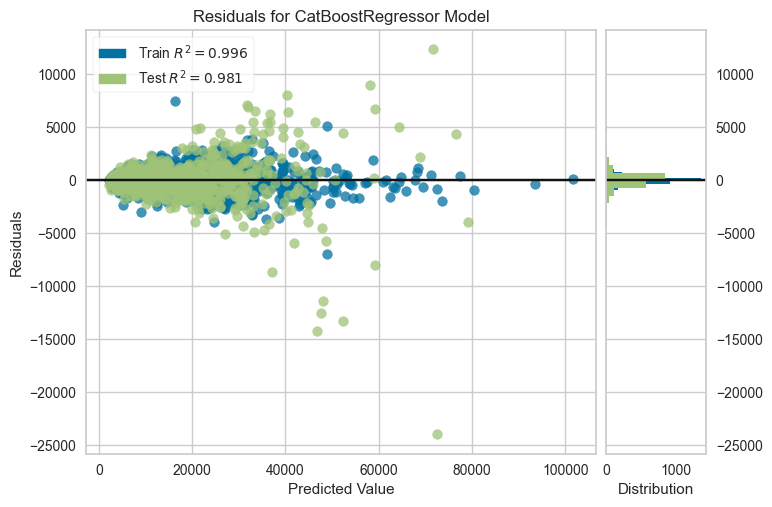

In [9]:
# plot residuals
plot_model(best, plot = 'residuals')

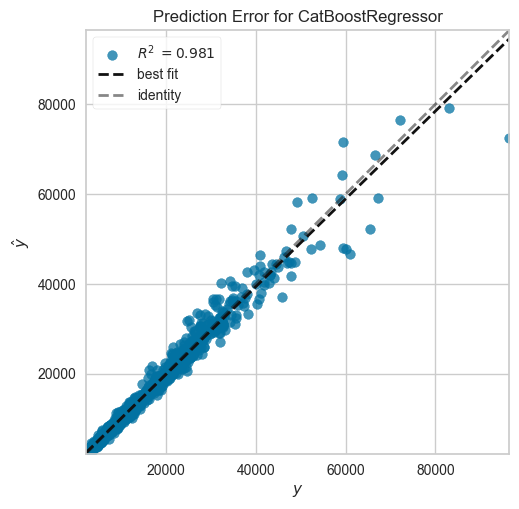

In [10]:
# plot error
plot_model(best, plot = 'error')

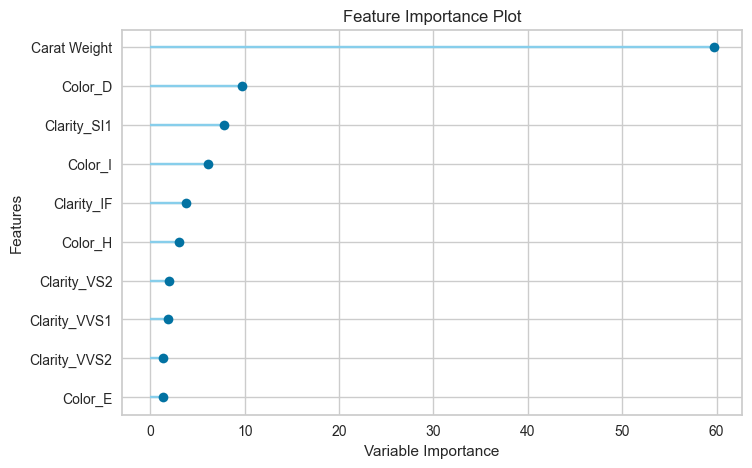

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

In [12]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

In [13]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,640.2231,2024988.6119,1423.0209,0.9806,0.0666,0.0486


In [14]:
# show predictions df
holdout_pred.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
1201,0.75,Ideal,G,VVS2,EX,EX,GIA,3879,3834.634743
1084,1.08,Ideal,F,SI1,VG,VG,GIA,5534,5770.233293
2060,1.29,Very Good,G,VS1,G,VG,GIA,9105,9600.678453
248,1.19,Ideal,G,VS1,ID,ID,AGSL,8034,8567.289163
5603,1.01,Very Good,E,SI1,VG,VG,GIA,5384,5351.944959


In [15]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('Price', axis=1, inplace=True)
new_data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA


In [16]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5460.455394
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3580.091140
2,0.85,Ideal,H,SI1,EX,EX,GIA,3468.547447
3,0.91,Ideal,E,SI1,VG,VG,GIA,4449.022685
4,0.83,Ideal,G,SI1,EX,EX,GIA,3450.363353


___

In [17]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Rep...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',


In [18]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/rx/lm_kfng95w9_1rxj88cthphm0000gq/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent')...
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x3339db760>)])

In [19]:
s = setup(data, target = 'Price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


In [20]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [21]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Very Good,Cut_Fair,Cut_Signature-Ideal,Color_D,Color_G,Color_E,Color_H,...,Clarity_FL,Polish_EX,Polish_G,Polish_VG,Polish_ID,Symmetry_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Report
3842,0.90,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3609,1.57,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5269,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
59,0.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1981,0.91,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4060,1.21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1346,1.02,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3454,1.23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [23]:
# init setup with normalize = True
s = setup(data, target = 'Price', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


<Axes: >

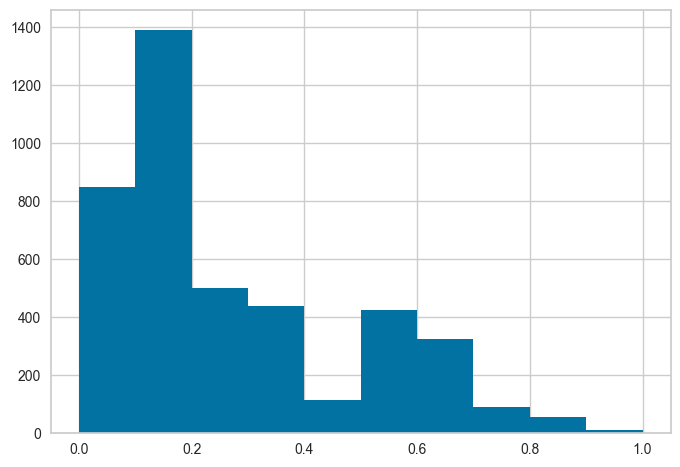

In [24]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Carat Weight'].hist()

<Axes: >

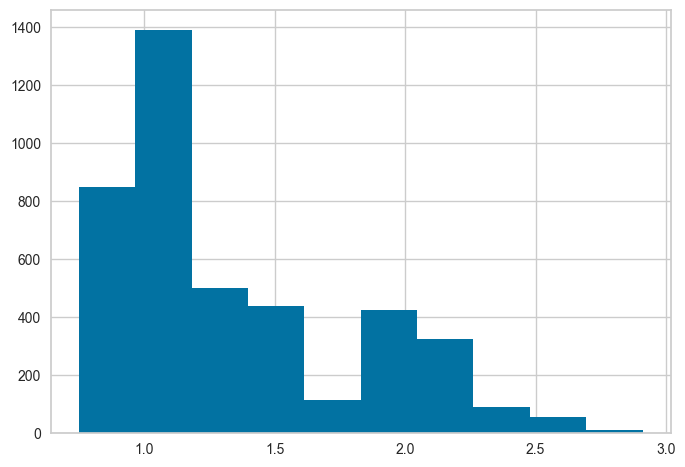

In [25]:
get_config('X_train')['Carat Weight'].hist()

In [26]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,584.5108,1409865.7331,1161.1578,0.9868,0.0641,0.0471,0.0800
xgboost,Extreme Gradient Boosting,669.4844,1821212.1477,1331.1471,0.9826,0.0722,0.0530,0.0160
et,Extra Trees Regressor,719.6871,2033874.0284,1390.8879,0.9809,0.0786,0.0585,0.0990
rf,Random Forest Regressor,726.1054,2340917.7181,1493.0324,0.9781,0.0786,0.0577,0.0880
lightgbm,Light Gradient Boosting Machine,721.5692,2747712.1060,1593.0198,0.9748,0.0750,0.0551,0.2540
gbr,Gradient Boosting Regressor,870.4619,2677900.4116,1616.3756,0.9744,0.0990,0.0750,0.0340
dt,Decision Tree Regressor,922.2270,3509926.6157,1825.8802,0.9662,0.1026,0.0745,0.0140
ridge,Ridge Regression,2484.7348,14960721.0553,3841.0471,0.8568,0.6498,0.2950,0.0130
llar,Lasso Least Angle Regression,2490.3768,14993968.1814,3845.5096,0.8565,0.6557,0.2960,0.0120
lasso,Lasso Regression,2490.3588,14993977.5999,3845.5107,0.8565,0.6558,0.2960,0.0180


In [27]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [28]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,584.5108,1409865.7331,1161.1578,0.9868,0.0641,0.0471,0.0890
xgboost,Extreme Gradient Boosting,669.4844,1821212.1477,1331.1471,0.9826,0.0722,0.0530,0.0170
et,Extra Trees Regressor,719.6871,2033874.0284,1390.8879,0.9809,0.0786,0.0585,0.1070
rf,Random Forest Regressor,726.1054,2340917.7181,1493.0324,0.9781,0.0786,0.0577,0.1020
lightgbm,Light Gradient Boosting Machine,721.5692,2747712.1060,1593.0198,0.9748,0.0750,0.0551,0.2510
gbr,Gradient Boosting Regressor,870.4619,2677900.4116,1616.3756,0.9744,0.0990,0.0750,0.0350
dt,Decision Tree Regressor,922.2270,3509926.6157,1825.8802,0.9662,0.1026,0.0745,0.0140


In [29]:
compare_tree_models

In [30]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,584.5108,1.409866e+06,1161.1578,0.9868,0.0641,0.0471,0.089
xgboost,Extreme Gradient Boosting,669.4844,1.821212e+06,1331.1471,0.9826,0.0722,0.0530,0.017
et,Extra Trees Regressor,719.6871,2.033874e+06,1390.8879,0.9809,0.0786,0.0585,0.107
rf,Random Forest Regressor,726.1054,2.340918e+06,1493.0324,0.9781,0.0786,0.0577,0.102
lightgbm,Light Gradient Boosting Machine,721.5692,2.747712e+06,1593.0198,0.9748,0.0750,0.0551,0.251
gbr,Gradient Boosting Regressor,870.4619,2.677900e+06,1616.3756,0.9744,0.0990,0.0750,0.035
dt,Decision Tree Regressor,922.2270,3.509927e+06,1825.8802,0.9662,0.1026,0.0745,0.014


In [31]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,584.5108,1409865.7331,1161.1578,0.9868,0.0641,0.0471,0.0910
xgboost,Extreme Gradient Boosting,669.4844,1821212.1477,1331.1471,0.9826,0.0722,0.0530,0.0200
et,Extra Trees Regressor,719.6871,2033874.0284,1390.8879,0.9809,0.0786,0.0585,0.1140
lightgbm,Light Gradient Boosting Machine,721.5692,2747712.1060,1593.0198,0.9748,0.0750,0.0551,0.2590
rf,Random Forest Regressor,726.1054,2340917.7181,1493.0324,0.9781,0.0786,0.0577,0.1020
gbr,Gradient Boosting Regressor,870.4619,2677900.4116,1616.3756,0.9744,0.0990,0.0750,0.0470
dt,Decision Tree Regressor,922.2270,3509926.6157,1825.8802,0.9662,0.1026,0.0745,0.0170
huber,Huber Regressor,1981.9256,19927308.7471,4424.4078,0.8103,0.3983,0.1677,0.0180
par,Passive Aggressive Regressor,1989.1845,21640306.6075,4602.6368,0.7947,0.3980,0.1588,0.0150
ridge,Ridge Regression,2484.7348,14960721.0553,3841.0471,0.8568,0.6498,0.2950,0.0130


In [32]:
# list of top 3 models by MAE
best_mae_models_top3

 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [33]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [34]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2484.5048,15795269.7476,3974.3263,0.8578,0.7573,0.3126
1,2325.9155,10049929.4290,3170.1624,0.8780,0.6232,0.2942
2,2840.8643,21511839.4595,4638.0858,0.8080,0.6132,0.3405
3,2786.4476,17784591.3095,4217.1781,0.8415,0.6233,0.2979
4,2612.2286,15155904.4143,3893.0585,0.8512,0.6789,0.3193
5,2468.4667,12520907.8095,3538.4895,0.8556,0.6243,0.3091
6,2566.6905,21996561.7714,4690.0492,0.8346,0.5064,0.2707
7,2584.6262,13642468.5643,3693.5712,0.8654,0.6582,0.3138
8,2386.5833,12568955.5405,3545.2723,0.8788,0.6101,0.2855


In [35]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2484.5048,1.579527e+07,3974.3263,0.8578,0.7573,0.3126
1,2325.9155,1.004993e+07,3170.1624,0.8780,0.6232,0.2942
2,2840.8643,2.151184e+07,4638.0858,0.8080,0.6132,0.3405
3,2786.4476,1.778459e+07,4217.1781,0.8415,0.6233,0.2979
4,2612.2286,1.515590e+07,3893.0585,0.8512,0.6789,0.3193
5,2468.4667,1.252091e+07,3538.4895,0.8556,0.6243,0.3091
6,2566.6905,2.199656e+07,4690.0492,0.8346,0.5064,0.2707
7,2584.6262,1.364247e+07,3693.5712,0.8654,0.6582,0.3138
8,2386.5833,1.256896e+07,3545.2723,0.8788,0.6101,0.2855


In [36]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2506.8971,15599902.0229,3949.6711,0.8451,0.6847,0.2997
1,2851.2129,17696273.7543,4206.6939,0.8345,0.6592,0.3352
2,2498.2486,14347997.2986,3787.8750,0.8601,0.6986,0.2964
Mean,2618.7862,15881391.0252,3981.4134,0.8466,0.6808,0.3104
Std,164.3884,1381343.7539,172.4490,0.0105,0.0163,0.0176


In [37]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2528.7350,16104323.0522,4013.0192,0.8550,0.7005,0.3226
1,2423.8299,10330471.5505,3214.1051,0.8746,0.7022,0.3143
2,2549.3104,20159733.0333,4489.9591,0.8200,0.6564,0.2862
3,2657.1613,16876349.3853,4108.0834,0.8496,0.6516,0.2834
4,2594.9338,14889080.5292,3858.6371,0.8538,0.7051,0.3198
5,2484.3680,12330784.3672,3511.5217,0.8578,0.5779,0.3144
6,2563.8717,22129320.7856,4704.1812,0.8336,0.5362,0.2714
7,2605.1909,13720821.7983,3704.1628,0.8646,0.8055,0.3168
8,2462.5546,12667994.6906,3559.2127,0.8778,0.6305,0.2993


LinearRegression(fit_intercept=False, n_jobs=-1)

In [38]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

LinearRegression(n_jobs=-1)

In [39]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,883.5726,2441988.7429,1562.6864,0.9780,0.1096,0.0783
1,945.9189,3254244.7836,1803.9525,0.9605,0.0982,0.0755
2,878.7046,2590319.6993,1609.4470,0.9769,0.0948,0.0708
3,948.1840,3191540.4956,1786.4883,0.9716,0.0984,0.0711
4,873.2750,2837964.1826,1684.6258,0.9721,0.1017,0.0712
5,890.8478,2191425.9611,1480.3466,0.9747,0.1032,0.0748
6,985.7263,6178398.7352,2485.6385,0.9535,0.1062,0.0770
7,1091.4742,7689765.9961,2773.0427,0.9241,0.1095,0.0785
8,886.9236,2485864.8594,1576.6626,0.9760,0.1036,0.0756


In [40]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,965.3991,3936322.5001,1984.0168,0.9646,0.1142,0.0800
1,983.4389,3251389.7700,1803.1610,0.9605,0.1051,0.0797
2,988.8764,4189714.1051,2046.8791,0.9626,0.1050,0.0766
3,1047.4672,3256006.0502,1804.4406,0.9710,0.1062,0.0804
4,882.2025,2156566.6859,1468.5253,0.9788,0.1043,0.0740
5,946.6805,2691987.6565,1640.7278,0.9690,0.1041,0.0811
6,1085.0090,6441235.2658,2537.9589,0.9516,0.1205,0.0855
7,1079.5912,7680079.1446,2771.2956,0.9242,0.1115,0.0808
8,943.3914,2953665.1687,1718.6230,0.9715,0.1051,0.0809


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
dt

DecisionTreeRegressor(random_state=123)

In [42]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,942.1383,2921773.7216,1709.3197,0.9737,0.1102,0.0782
1,893.1408,2787312.3718,1669.5246,0.9662,0.0952,0.0729
2,816.3777,2356986.4727,1535.2480,0.9790,0.0935,0.0674
3,951.2225,3027916.6751,1740.0910,0.9730,0.0943,0.0702
4,829.7284,2174085.1873,1474.4779,0.9787,0.0993,0.0694
5,849.7631,2203174.2370,1484.3093,0.9746,0.1013,0.0739
6,973.4781,4587585.7123,2141.8650,0.9655,0.1029,0.0783
7,983.6851,7221667.3854,2687.3160,0.9287,0.1025,0.0723
8,838.8386,2229246.3515,1493.0661,0.9785,0.0951,0.0712


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [43]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,965.3991,3936322.5001,1984.0168,0.9646,0.1142,0.0800
1,983.4389,3251389.7700,1803.1610,0.9605,0.1051,0.0797
2,988.8764,4189714.1051,2046.8791,0.9626,0.1050,0.0766
3,1047.4672,3256006.0502,1804.4406,0.9710,0.1062,0.0804
4,882.2025,2156566.6859,1468.5253,0.9788,0.1043,0.0740
5,946.6805,2691987.6565,1640.7278,0.9690,0.1041,0.0811
6,1085.0090,6441235.2658,2537.9589,0.9516,0.1205,0.0855
7,1079.5912,7680079.1446,2771.2956,0.9242,0.1115,0.0808
8,943.3914,2953665.1687,1718.6230,0.9715,0.1051,0.0809


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
# model object
tuned_dt

DecisionTreeRegressor(random_state=123)

In [45]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Carat '
                                                                          'Weight'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['Cut',
                                                                          'Color',
                                                                          'Clarity',
                                                                          'Polish',
                                                                          'Symmetry',
                                                                          'Report'],
                                                                 transformer=SimpleImp...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123,

In [46]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1088.5821,6308077.7518,2511.5887,0.9432,0.1244,0.0882
1,1014.8893,3062015.3435,1749.8615,0.9628,0.1157,0.0862
2,1136.4083,5271522.7970,2295.9797,0.9529,0.1235,0.0888
3,1234.0643,5497354.9393,2344.6439,0.9510,0.1223,0.0896
4,980.8298,3001858.7042,1732.5873,0.9705,0.1162,0.0834
5,1094.0845,4276817.3625,2068.0468,0.9507,0.1209,0.0912
6,1195.4988,8187420.8506,2861.3670,0.9384,0.1288,0.0916
7,1152.5619,6647351.5726,2578.2458,0.9344,0.1151,0.0843
8,1057.9524,3519529.8298,1876.0410,0.9661,0.1174,0.0883


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [47]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,800.8000,2497699.3784,1580.4111,0.9775,0.0888,0.0650
1,738.8592,1817362.9450,1348.0960,0.9779,0.0787,0.0599
2,819.7621,3111907.7366,1764.0600,0.9722,0.0818,0.0608
3,808.4474,2228678.5549,1492.8759,0.9801,0.0820,0.0602
4,661.4373,1391462.3521,1179.6026,0.9863,0.0785,0.0560
5,752.2897,1977562.5757,1406.2584,0.9772,0.0810,0.0609
6,861.9991,5686235.7651,2384.5829,0.9572,0.0904,0.0657
7,789.0349,2634016.4190,1622.9653,0.9740,0.0821,0.0592
8,749.4086,1953422.2737,1397.6488,0.9812,0.0833,0.0628


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [48]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,865.8650,3394522.4583,1842.4230,0.9694,0.0992,0.0687
1,784.3843,2131972.1708,1460.1275,0.9741,0.0831,0.0637
2,866.5492,3583984.5118,1893.1414,0.9680,0.0886,0.0665
3,832.3752,2591477.2320,1609.8066,0.9769,0.0881,0.0624
4,729.6026,2096323.0337,1447.8684,0.9794,0.0892,0.0602
5,763.5797,1940516.0571,1393.0241,0.9776,0.0855,0.0629
6,1010.1707,9889233.4807,3144.7152,0.9256,0.1063,0.0716
7,849.3932,3579010.1826,1891.8272,0.9647,0.0878,0.0630
8,718.8854,1659107.9112,1288.0636,0.9840,0.0822,0.0602


AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

In [49]:
# top 3 models based on mae
best_mae_models_top3

 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [50]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,594.0055,1253278.4203,1119.4992,0.9887,0.0662,0.0499
1,577.4501,1309982.8507,1144.5448,0.9841,0.0640,0.0474
2,619.9813,1456617.1441,1206.9039,0.9870,0.0640,0.0496
3,641.3768,1535142.1203,1239.0085,0.9863,0.0667,0.0474
4,542.1519,845026.6452,919.2533,0.9917,0.0611,0.0453
5,587.0513,1118920.2758,1057.7903,0.9871,0.0646,0.0479
6,707.3674,3799058.8351,1949.1175,0.9714,0.0714,0.0519
7,598.3526,1273878.4737,1128.6622,0.9874,0.0676,0.0469
8,599.7761,1257875.4873,1121.5505,0.9879,0.0654,0.0498


VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x3336e02b0>),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_ty...
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None, ...)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

In [51]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,583.6393,1255159.9758,1120.3392,0.9887,0.0668,0.0494
1,568.5120,1218529.9453,1103.8704,0.9852,0.0636,0.0474
2,619.7598,1431072.9072,1196.2746,0.9872,0.0660,0.0501
3,639.1040,1489284.7617,1220.3626,0.9867,0.0670,0.0475
4,518.7316,750177.3017,866.1278,0.9926,0.0598,0.0440
5,572.1158,1056277.2492,1027.7535,0.9878,0.0679,0.0480
6,675.6947,3456897.0830,1859.2733,0.9740,0.0698,0.0498
7,580.6372,1195704.2358,1093.4826,0.9882,0.0684,0.0474
8,588.5778,1238482.1170,1112.8711,0.9881,0.0636,0.0479


StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x33605c730>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

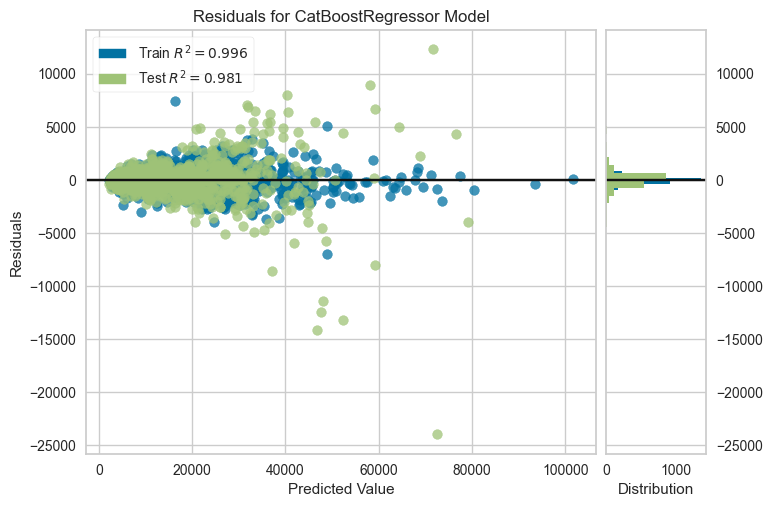

In [52]:
# plot residuals
plot_model(best, plot = 'residuals')

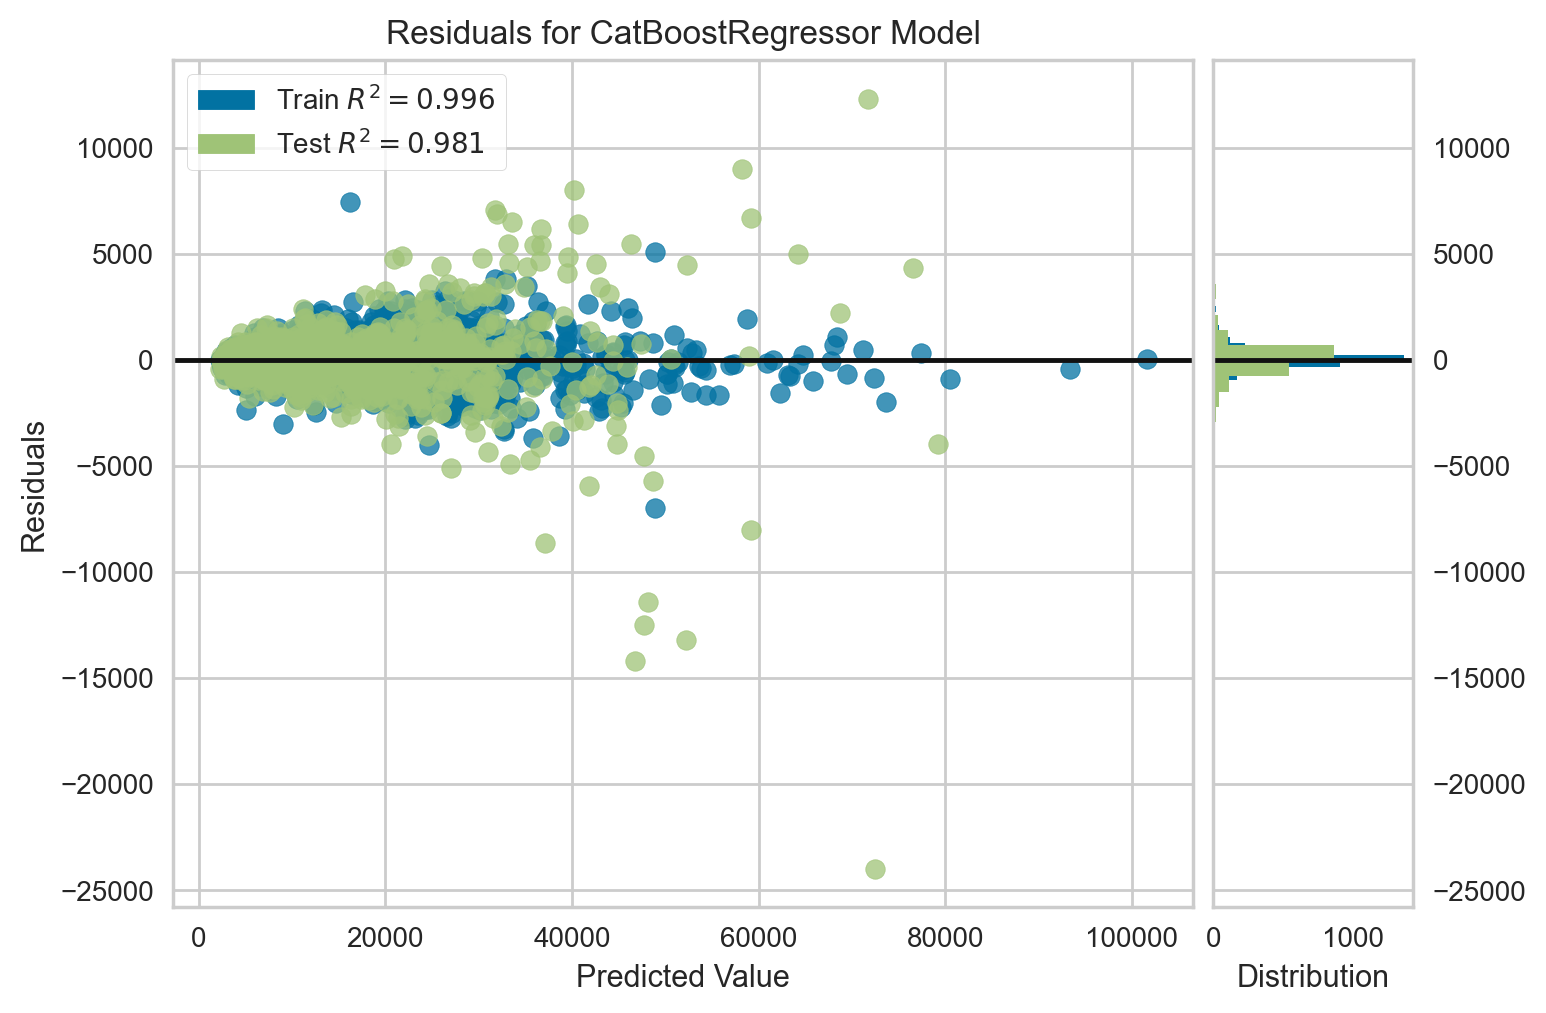

In [53]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [54]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

In [55]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,728.1073,3056899.2425,1748.3991,0.9725,0.0758,0.0559
1,620.5507,1384383.4619,1176.5983,0.9832,0.0694,0.0528
2,776.0034,4464710.8335,2112.9862,0.9601,0.0776,0.0554
3,789.3199,2524618.1444,1588.9047,0.9775,0.0766,0.0561
4,713.5664,1799499.7585,1341.4543,0.9823,0.0745,0.0556
5,677.4463,1723296.8165,1312.7440,0.9801,0.0745,0.0553
6,877.7891,7279172.3793,2697.9941,0.9453,0.0849,0.0594
7,710.0915,2162297.3059,1470.4752,0.9787,0.0798,0.0539
8,712.1233,1670611.4799,1292.5214,0.9839,0.0729,0.0572


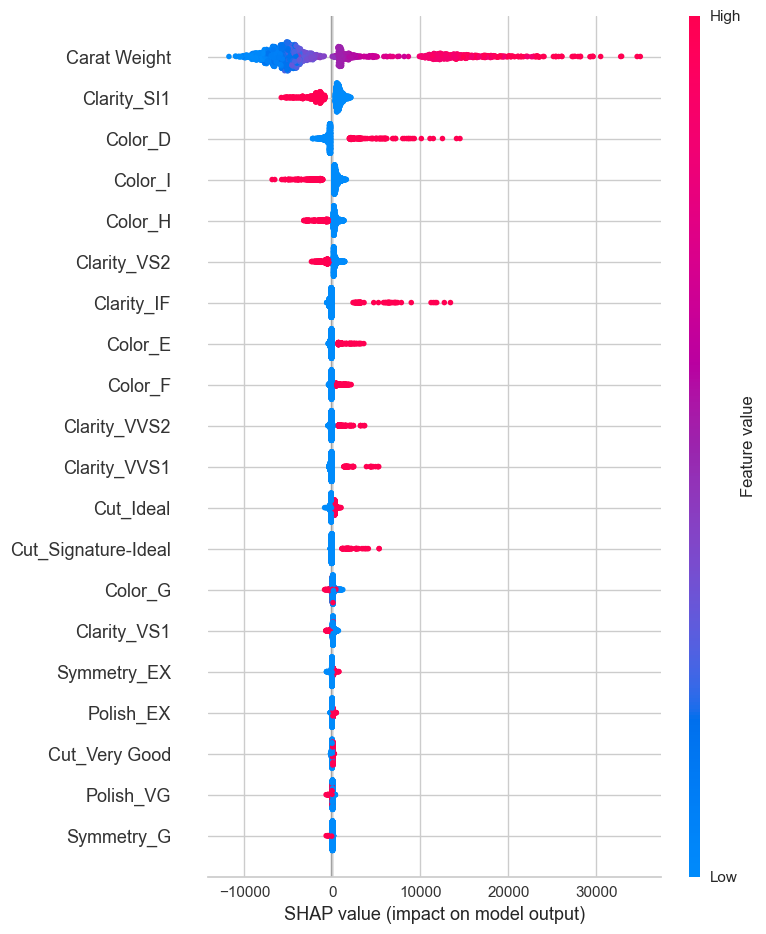

In [56]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [57]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [58]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['Carat Weight'], ...",2541.9480,1.532143e+07,3885.1306,0.8534,0.6406,0.3030
1,Lasso Regression,"(TransformerWrapper(include=['Carat Weight'], ...",2490.3588,1.499398e+07,3845.5107,0.8565,0.6558,0.2960
2,Ridge Regression,"(TransformerWrapper(include=['Carat Weight'], ...",2484.7348,1.496072e+07,3841.0471,0.8568,0.6498,0.2950
3,Elastic Net,"(TransformerWrapper(include=['Carat Weight'], ...",6573.6001,8.415771e+07,9147.6025,0.1870,0.6720,0.7745
4,Least Angle Regression,"(TransformerWrapper(include=['Carat Weight'], ...",364427.3698,2.421201e+12,760139.6737,-26632.6044,2.2145,56.7176
...,...,...,...,...,...,...,...,...
60,Decision Tree Regressor,"(TransformerWrapper(include=['Carat Weight'], ...",770.0075,2.521465e+06,1556.0805,0.9762,0.0828,0.0609
61,Decision Tree Regressor,"(TransformerWrapper(include=['Carat Weight'], ...",819.0778,3.304179e+06,1744.6001,0.9695,0.0891,0.0640
62,Voting Regressor,"(TransformerWrapper(include=['Carat Weight'], ...",600.2001,1.476306e+06,1184.1988,0.9861,0.0649,0.0480


In [59]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Rep...
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model',
                 <catboost.core.CatBoostRegressor object at 0x3337ef040>]])

In [60]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x3361a4be0>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [64]:
# dashboard function
dashboard(lr)

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.0.0.29:8050


In [65]:
# create gradio app
create_app(best)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [66]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [67]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [68]:
final_best = finalize_model(best)

In [69]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Rep...
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x34bfcdb40>)])

In [70]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[0] <= 0.4722221940755844) {
            if (input[0] <= 0.22453703731298447) {
                if (input[0] <= 0.11342592537403107) {
                    if (input[0] <= 0.05787036754190922) {
                        if (input[11] <= 0.5) {
                            if (input[14] <= 0.5) {
                                if (input[0] <= 0.020833340473473072) {
                                    if (input[6] <= 0.5) {
                                        if (input[8] <= 0.5) {
                                            if (input[16] <= 0.5) {
                                                if (input[23] <= 0.5) {
                                                    if (input[20] <= 0.5) {
                                                        if (input[0] <= 0.011574062518775463) {
                                                            if (input[25] <= 0.5) {
        

In [71]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Rep...
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                                                     'Polish',
                               

In [72]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/rx/lm_kfng95w9_1rxj88cthphm0000gq/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent')...
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x34fee8670>)])

In [73]:
# save experiment
save_experiment('my_experiment')

In [74]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True
